In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interp1d(x, y)

In [3]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
y

array([1.        , 0.71653131, 0.51341712, 0.36787944, 0.26359714,
       0.1888756 , 0.13533528, 0.09697197, 0.06948345, 0.04978707])

In [5]:
f(x)

array([1.        , 0.71653131, 0.51341712, 0.36787944, 0.26359714,
       0.1888756 , 0.13533528, 0.09697197, 0.06948345, 0.04978707])

In [6]:
f(0)

array(1.)

In [7]:
f(1)

array(0.71653131)

In [8]:
f2 = interp1d(x, y, kind='cubic')

In [9]:
f2(x)

array([1.        , 0.71653131, 0.51341712, 0.36787944, 0.26359714,
       0.1888756 , 0.13533528, 0.09697197, 0.06948345, 0.04978707])

In [10]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

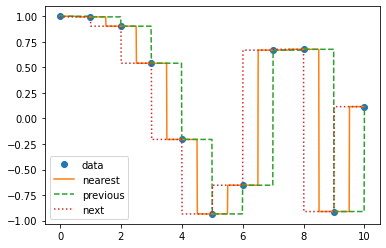

In [11]:
xnew = np.linspace(0, 10, num=1001, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

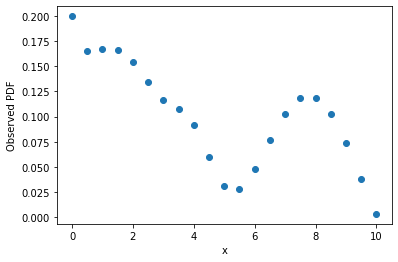

In [12]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("Observed PDF");

In [13]:
len(xs)

21

In [14]:
len(ys)

21

In [15]:
plt.rcParams['figure.figsize'] = 10,6

In [18]:
splrep(xs, ys)

(array([ 0. ,  0. ,  0. ,  0. ,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
         4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. , 10. ,
        10. , 10. , 10. ]),
 array([0.2       , 0.15367953, 0.16914093, 0.16787193, 0.15568859,
        0.1333737 , 0.11481659, 0.10935993, 0.09574368, 0.05966536,
        0.02559489, 0.02395509, 0.04658477, 0.07770585, 0.10459185,
        0.12192674, 0.12170117, 0.10526858, 0.06520984, 0.02414508,
        0.003     , 0.        , 0.        , 0.        , 0.        ]),
 3)

In [19]:
splev(x, splrep(xs, ys))

array([0.2       , 0.19862595, 0.19728557, 0.19597846, 0.19470424,
       0.19346252, 0.19225293, 0.19107507, 0.18992857, 0.18881303,
       0.18772808, 0.18667332, 0.18564838, 0.18465287, 0.1836864 ,
       0.18274859, 0.18183905, 0.18095741, 0.18010326, 0.17927624,
       0.17847596, 0.17770203, 0.17695406, 0.17623167, 0.17553448,
       0.17486211, 0.17421416, 0.17359025, 0.17299001, 0.17241303,
       0.17185895, 0.17132737, 0.17081791, 0.17033018, 0.16986381,
       0.16941839, 0.16899356, 0.16858893, 0.16820411, 0.16783871,
       0.16749236, 0.16716466, 0.16685524, 0.1665637 , 0.16628967,
       0.16603276, 0.16579258, 0.16556875, 0.16536088, 0.16516859,
       0.1649915 , 0.16482922, 0.16468136, 0.16454755, 0.16442739,
       0.1643205 , 0.1642265 , 0.16414501, 0.16407563, 0.16401798,
       0.16397168, 0.16393635, 0.16391159, 0.16389703, 0.16389228,
       0.16389695, 0.16391066, 0.16393303, 0.16396367, 0.16400219,
       0.16404822, 0.16410136, 0.16416123, 0.16422745, 0.16429

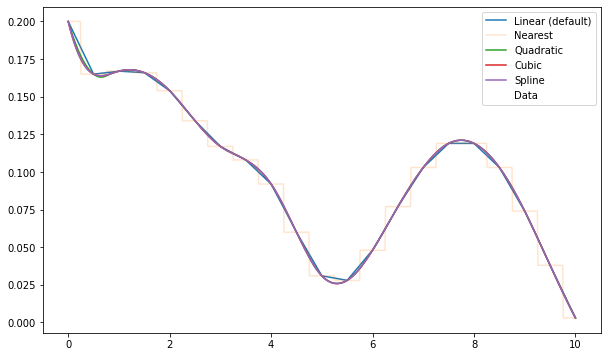

In [17]:
x = np.linspace(min(xs), max(xs), 1000)
y1 = interp1d(xs, ys)(x)
y2 = interp1d(xs, ys, kind="nearest")(x)
y3 = interp1d(xs, ys, kind="quadratic")(x)
y4 = interp1d(xs, ys, kind="cubic")(x)

from scipy.interpolate import splev, splrep
y5 = splev(x, splrep(xs, ys))

plt.scatter(xs, ys, s=30, label="Data", c="w")
plt.plot(x, y1, label="Linear (default)")
plt.plot(x, y2, label="Nearest", alpha=0.2)
plt.plot(x, y3, label="Quadratic", ls='-')
plt.plot(x, y4, label="Cubic", ls='-')
plt.plot(x, y5, label="Spline", ls='-', alpha=1)
plt.legend();

In [25]:
x_norm = np.linspace(min(xs), max(xs), 1000)
y_norm = interp1d(xs, ys, kind="quadratic")(x_norm)
normalisation = simps(y_norm, x=x_norm)

In [26]:
normalisation

1.0012951939288757

In [29]:
x_vals = np.linspace(0, 10, 1000)
y_vals = interp1d(xs, ys, kind="quadratic")(x_vals) 
simps(y_vals, x=x_vals)

1.0012951939288757

In [30]:
x_vals = np.linspace(6, 9.3, 1000)
y_vals = interp1d(xs, ys, kind="quadratic")(x_vals) 
simps(y_vals, x=x_vals)

0.31254208763350555

In [31]:
x_norm = np.linspace(min(xs), max(xs), 1000)
y_norm = interp1d(xs, ys, kind="quadratic")(x_norm)
normalisation = simps(y_norm, x=x_norm)
x_vals = np.linspace(6, 9.3, 1000)
y_vals = interp1d(xs, ys, kind="quadratic")(x_vals) 
simps(y_vals, x=x_vals)/normalisation

0.31213780863878404

In [20]:
from scipy.integrate import simps

def get_prob(xs, ys, a, b, resolution=1000):           # a, b are bounds(boundaries between to points, area betweem two points)
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind="quadratic")(x_norm)
    normalisation = simps(y_norm, x=x_norm)
    x_vals = np.linspace(a, b, resolution)       
    y_vals = interp1d(xs, ys, kind="quadratic")(x_vals)      #evalute at x_vals
    return simps(y_vals, x=x_vals) / normalisation

def get_cdf(xs, ys, v):     # v= some value we want cdf at
    return get_prob(xs, ys, min(xs), v)

def get_sf(xs, ys, v):
    return 1 - get_cdf(xs, ys, v)

print(get_prob(xs, ys, 0, 10))

1.0


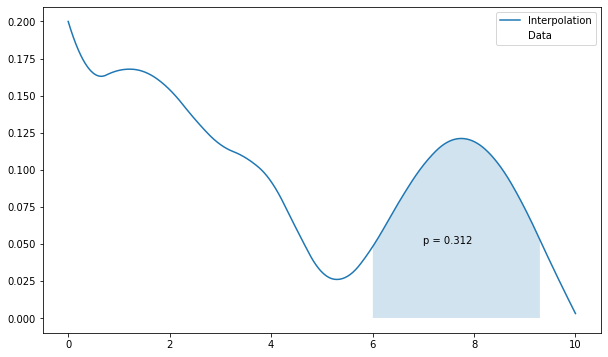

In [32]:
v1, v2 = 6, 9.3
area = get_prob(xs, ys, v1, v2)

plt.scatter(xs, ys, s=30, label="Data", color="w")
plt.plot(x, y3, linestyle="-", label="Interpolation")
plt.fill_between(x, 0, y3, where=(x>=v1)&(x<=v2), alpha=0.2)
plt.annotate(f"p = {area:.3f}", (7, 0.05))
plt.legend();

In [36]:
len(cdf_new)

100

In [41]:
len(cheap_cdf)

1000

In [53]:
y3.cumsum()

array([  0.2       ,   0.3988714 ,   0.59663167,   0.79329832,
         0.9888888 ,   1.18342062,   1.37691125,   1.56937818,
         1.76083889,   1.95131086,   2.14081157,   2.32935852,
         2.51696918,   2.70366103,   2.88945156,   3.07435826,
         3.2583986 ,   3.44159007,   3.62395015,   3.80549633,
         3.98624609,   4.16621691,   4.34542627,   4.52389166,
         4.70163056,   4.87866046,   5.05499884,   5.23066317,
         5.40567096,   5.58003966,   5.75378678,   5.9269298 ,
         6.09948619,   6.27147344,   6.44290904,   6.61381046,
         6.7841952 ,   6.95408072,   7.12348453,   7.29242409,
         7.4609169 ,   7.62898043,   7.79663218,   7.96388962,
         8.13077023,   8.2972915 ,   8.46347092,   8.62932596,
         8.79487411,   8.96013285,   9.12511967,   9.28985205,
         9.45434747,   9.61862342,   9.78269737,   9.94658682,
        10.11030924,  10.27388212,  10.43732294,  10.60064918,
        10.76387834,  10.92702788,  11.0901153 ,  11.25

In [52]:
y3.cumsum() / y3.sum()

array([0.00199738, 0.0039835 , 0.00595852, 0.00792261, 0.00987596,
       0.01181873, 0.01375111, 0.01567326, 0.01758536, 0.01948759,
       0.02138012, 0.02326313, 0.02513678, 0.02700126, 0.02885673,
       0.03070338, 0.03254138, 0.0343709 , 0.03619212, 0.0380052 ,
       0.03981034, 0.04160769, 0.04339744, 0.04517976, 0.04695483,
       0.04872281, 0.05048389, 0.05223824, 0.05398603, 0.05572743,
       0.05746263, 0.0591918 , 0.06091511, 0.06263273, 0.06434485,
       0.06605162, 0.06775324, 0.06944988, 0.0711417 , 0.07282889,
       0.07451161, 0.07619005, 0.07786438, 0.07953476, 0.08120139,
       0.08286442, 0.08452404, 0.08618043, 0.08783374, 0.08948417,
       0.09113188, 0.09277705, 0.09441985, 0.09606046, 0.09769906,
       0.09933581, 0.10097089, 0.10260448, 0.10423675, 0.10586788,
       0.10749804, 0.1091274 , 0.11075614, 0.11238444, 0.11401246,
       0.11564039, 0.1172684 , 0.11889666, 0.12052534, 0.12215463,
       0.12378469, 0.12541571, 0.12704785, 0.12868129, 0.13031

In [42]:
len(y3.cumsum())

1000

In [44]:
y3.sum()

100.13092733890825

In [47]:
import warnings
warnings.filterwarnings('ignore')

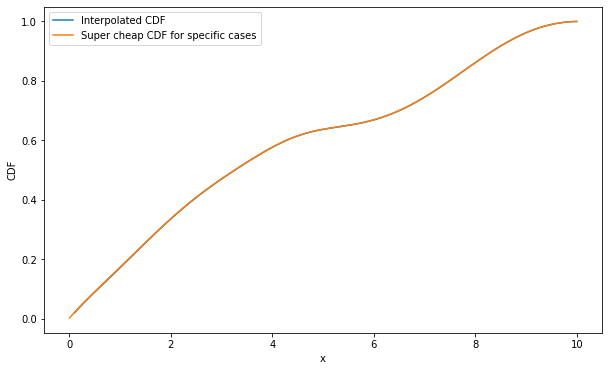

In [49]:
x_new = np.linspace(min(xs), max(xs), 100)
cdf_new = [get_cdf(xs, ys, i) for i in x_new]
cheap_cdf = y3.cumsum() / y3.sum()              #dividing it with y3.sum to normalize it(why normalized? 
#     because y3.cumsum() is just the like cummulative sum of any array, normalizing will bring the values between 0 to 1, 
#     which is more like probability values )

plt.plot(x_new, cdf_new, label="Interpolated CDF")
plt.plot(x, cheap_cdf, label="Super cheap CDF for specific cases")
plt.ylabel("CDF")
plt.xlabel("x")
plt.legend();

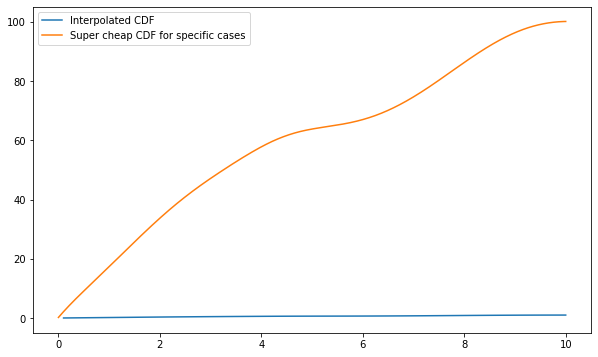

In [57]:
plt.plot(x_new, cdf_new, label="Interpolated CDF")
plt.plot(x, y3.cumsum(), label="Super cheap CDF for specific cases")       # cdf without normalizing 
plt.legend();